# 3.4 Ein Einfaches Neuronales Netz

In [2]:
import random
import os.path
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix  
import matplotlib.pyplot as plt

In [3]:
# Generate random hash
hash = random.getrandbits(16)
print("Hash: ", hash)

Hash:  2407


In [4]:
# Lade den Iris-Datenset
data_train = pd.read_csv('./input/iris.csv')

In [5]:
# Die 3 zu erkennenden Klassifikationsklassen werden zu numerischen Werten 0, 1 bzw. 2 umgewandelt.
data_train.loc[data_train['species']=='Iris-setosa', 'species']=0
data_train.loc[data_train['species']=='Iris-versicolor', 'species']=1
data_train.loc[data_train['species']=='Iris-virginica', 'species']=2
data_train = data_train.apply(pd.to_numeric)

In [6]:
# Der eingelesene Datenset wird als Matrix dargestellt
data_train_array = data_train.values # oder data_train.to_numpy()

In [7]:
# Zur Sicherstellung der Reproduzierbarkeit der Ergebnisse setzen wir random.seed auf eine festen Wert, z.B. 42
np.random.seed(17)

Das Datenset wird in zwei separate Kategorie gespaltet: Testdaten und Trainingsdaten. 

80% der Daten werden zum Trainieren und 20% zum Testen des Modells verwendet. 

Da es sich bei der Eingabe um einen Vektor handelt, werden wird den Großbuchstaben X benutzen.

Für die Ausgabe hingegen handelt es sich um ein einzelner Werte, 
daher die Bezeichung mit dem Kleinbuchstaben y.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(data_train_array[:,:4],
                                                    data_train_array[:,4],
                                                    test_size=0.2)

### Version 1
Ein neuronales Netz zur Klassifikation (MultiLayerPerceptron) wird mit folgenden Eigenschaften gebildet:
- einem Input-Layer mit 4 Neuronen, die die Merkmale der Iris-Planze repräsentieren
- einem Hidden-Layer mit 10 Neuronen
- einem Output-Layer mit 3 Neuronen, die die zu erkennenden Klassen repräsentieren

Dabei wird als Aktivierungsfunktion relu und als Optimierer adam verwenden.

<img src="img/network_01.png" height="400"/>

In [9]:
mlp = MLPClassifier(hidden_layer_sizes=(10,),activation='relu', solver='adam', max_iter=350, batch_size=10, verbose=True)

### Version 2
Erstelle eine zweite Version des neuronalen Netzes mit folgenden Eigenschaften:
- einem Input-Layer mit 4 Neuronen, die die Merkmale der Iris-Planze repräsentieren
- zwei Hidden-Layer mit jeweils 3 und 5 Neuronen
- einem Output-Layer mit 3 Neuronen, die die zu erkennenden Klassen repräsentieren

Füge die Zweite Version direkt unter der Ersten ein. Und führe die neu Zelle und alle folgenden aus.

<img src="img/network_02.png" height="400"/>

In [10]:
# Zweite Version:

In [11]:
# Das neuronale Netz wird mit den Trainingsdaten traniert
mlp.fit(X_train, y_train)

Iteration 1, loss = 4.00250272
Iteration 2, loss = 3.40553964
Iteration 3, loss = 2.83501057
Iteration 4, loss = 2.31506032
Iteration 5, loss = 1.83550853
Iteration 6, loss = 1.51090872
Iteration 7, loss = 1.32850876
Iteration 8, loss = 1.24046965
Iteration 9, loss = 1.17041371
Iteration 10, loss = 1.12110589
Iteration 11, loss = 1.07358008
Iteration 12, loss = 1.03679092
Iteration 13, loss = 1.00474070
Iteration 14, loss = 0.97298690
Iteration 15, loss = 0.94589371
Iteration 16, loss = 0.92051278
Iteration 17, loss = 0.89480893
Iteration 18, loss = 0.87292932
Iteration 19, loss = 0.84832888
Iteration 20, loss = 0.82650054
Iteration 21, loss = 0.80645614
Iteration 22, loss = 0.78835510
Iteration 23, loss = 0.76874525
Iteration 24, loss = 0.75254667
Iteration 25, loss = 0.73259700
Iteration 26, loss = 0.71952956
Iteration 27, loss = 0.70244477
Iteration 28, loss = 0.68857793
Iteration 29, loss = 0.67245257
Iteration 30, loss = 0.66097361
Iteration 31, loss = 0.64636006
Iteration 32, los

/Users/FabianFranz/Development/Projects/velpTec/Tensorflow/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(batch_size=10, hidden_layer_sizes=(10,), max_iter=350,
              verbose=True)

In [12]:
# Das Ergebnis des Training wird ausgegeben
print("Trainingsergebnis: %5.3f" % mlp.score(X_train, y_train))

Trainingsergebnis: 0.983


In [13]:
# Das Modell wird mit den Testdatensdaten evaluiert
predictions = mlp.predict(X_test)
# und die Konfusionsmatrix ausgegeben
print(confusion_matrix(y_test,predictions))  

[[ 7  0  0]
 [ 0 11  0]
 [ 0  1 11]]


In [14]:
# Aus der Konfusionsmatrix werden precison, recall und f1-score berechnet und ausgebenen
print(classification_report(y_test,predictions)) 

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         7
         1.0       0.92      1.00      0.96        11
         2.0       1.00      0.92      0.96        12

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [15]:
# Das Modell wird getest und das Ergebnis ausgegeben
print("Testergebnis: %5.3f" % mlp.score(X_test,y_test))

Testergebnis: 0.967


In [16]:
# Folgendes gibt die Werte der Gewichte pro Layer aus
print("WEIGHTS:", mlp.coefs_)
print("BIASES:", mlp.intercepts_) 

WEIGHTS: [array([[-2.82928616e-02,  3.98626014e-01, -5.97650566e-02,
         3.60177468e-01,  8.35854375e-02,  4.61691767e-67,
         5.58140154e-01,  3.03496513e-01,  3.98363846e-01,
        -2.26749801e-02],
       [ 6.69030070e-01, -3.14379912e-01, -9.14913685e-02,
         5.20526479e-01, -6.07593114e-01, -3.72425974e-98,
         3.55825014e-01,  6.43137144e-01,  4.05330555e-01,
        -3.71695990e-01],
       [ 5.68242922e-01,  6.41685919e-01, -5.92638144e-02,
        -5.45713391e-01,  1.42606035e+00, -8.59704250e-22,
        -2.29152900e-03,  5.22687734e-01,  1.62946479e-02,
         4.20088178e-02],
       [ 3.74815797e-01,  5.69459224e-01, -2.24764024e-02,
        -6.67575691e-01,  1.20578245e+00, -1.95510383e-20,
        -9.93512796e-01, -1.93401619e-01,  2.19345212e-01,
         1.08464432e+00]]), array([[ 4.95433091e-01, -4.86281052e-01,  4.44882544e-01],
       [-7.49077340e-02, -5.77231816e-02,  3.09369926e-01],
       [ 5.35374686e-02, -8.18924816e-03, -5.34071722e-0

In [17]:
# Das Modell wird beispielsweise zur Vorhersage auf folgenden Werten 
# aus dem Testset angewandt mit den Merkmalen [sepal-length, sepal-width, 
# petal-length, petal-width]
print(mlp.predict([[5.1,3.5,1.4,0.2], [5.9,3.,5.1,1.8], [4.9,3.,1.4,0.2], [5.8,2.7,4.1,1.]]))

[0. 2. 0. 1.]


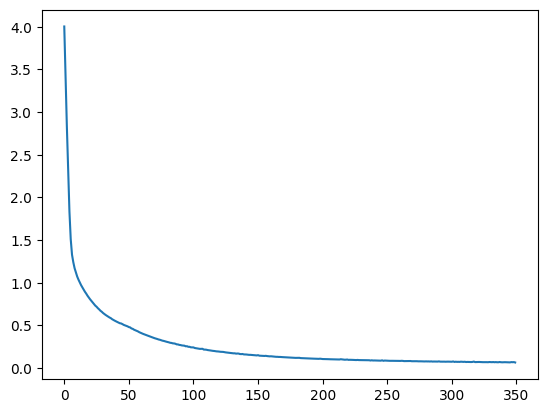

In [18]:
# Die Loss-Kurve wird visualisiert und in der Datei Plot_of_loss_values.png im PNG-Format gespeichert.
loss_values = mlp.loss_curve_
plt.plot(loss_values)
# Check, if there is already a file with the same name
# If yes, add a number to the filename
i = 0
while os.path.isfile("./output/plot_of_loss_values.png"):
    i += 1
    plt.savefig("./output/plot_of_loss_values" + str(i) + ".png")
plt.show()